In [236]:
%matplotlib inline
import csv
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np
import statistics

motion = []
time = []

f = "E:/Harshavardan/data/01102019_fish2_7dpf_1.5mA_50ms"

# looping through all the trials
for j in range(2,12):
    m = []
    t = []
    filename = f + "/rawMotion" + str(j) + ".csv"
    #filename = "E:/Harshavardan/classicalConditioningCode/data/rawMotion" + str(j) + ".csv"
    m = [] #stores raw motion
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            m.append(float(row[0]))
    
    filename = f + "/timestamp" + str(j) + ".csv"
    #filename = "E:/Harshavardan/classicalConditioningCode/data/timestamp" + str(j) + ".csv"
    t = [] #stores timestamp
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            t.append(float(row[0]))
    
    t0 = t[0]
    for i in range(0, len(t)):
        t[i]-=t0
        #t[i]/=1000
    
    motion.append(m)
    time.append(t[1:])    
        


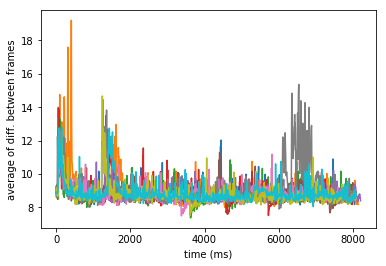

In [237]:
for i in range(0, len(motion)):
    plt.plot(time[i][0:1000], motion[i][0:1000])
    plt.xlabel("time (ms)")
    plt.ylabel("average of diff. between frames")

In [244]:
binned = [] # stores the average raw motion value for each bin, for all trials
binSize = 25 # bin size in ms
binn = binSize # which bin are we in right now?
values = [] # stores the values of raw motion in each bin, to be averaged later

for i in range(0, len(motion)):
    
    binnedTrial = [] # stores the averaged raw motion value for individual trials
    values = []   
    binn = binSize
    
    for j in range(0, len(motion[i])):
        
        if time[i][j] > binn:            
            
            if len(values) == 0:
                
                binnedTrial.append(0)            
                
            else:
                
                binnedTrial.append(statistics.mean(values))                
                
            values = []
            binn += binSize
            values.append(motion[i][j]) # I realised that when this condition is true, a value of raw motion is skipped        
            
        else:
            
            values.append(motion[i][j])            
            
    binned.append(binnedTrial)
    

    
averageMotion = [] # stores the average binned raw motion for this fish.


for i in range(0, int(300000/binSize)):
    
    for j in range(0, len(binned)):
        
        if i > (len(binned[j])-1):
            values.append(0)
            
        else:
            values.append(binned[j][i])
        
    filteredValues = [x for x in values if x != 0] # removing all 0 values
    
    if len(filteredValues) == 0:
        
        averageMotion.append(0)
        
    else:
        averageMotion.append(statistics.mean(filteredValues))
    values = []

Text(0.5, 1.0, 'E:/Harshavardan/data/01102019_fish2_7dpf_1.5mA_50ms_25bins')

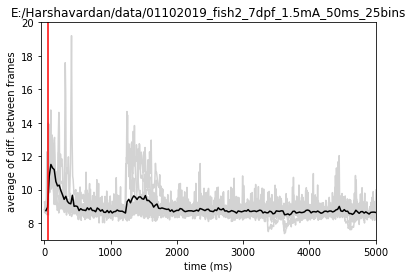

In [248]:
duration = 5000 # x axis of plot in ms
fig, ax = plt.subplots(1,1)
for i in range(0, len(motion)):
    ax.plot(time[i], motion[i], 'lightgray')
    ax.set_xlim(-50, duration)
    ax.set_ylim(7, 20)
    ax.set_xlabel("time (ms)")
    ax.set_ylabel("average of diff. between frames")
   
ax.plot(np.arange(binSize, duration + binSize, binSize ), averageMotion[0:int(duration/binSize)], 'k')
ax.plot([50, 50], [0, 20], 'r')
plt.title(f + "_" + str(binSize) + "bins")
#plt.savefig(f + "/averageMotion.png")

Text(0, 0.5, 'raw motion (sd)')

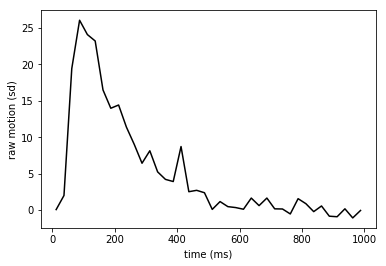

In [249]:
duration = 1000
normalised = []
sd = statistics.stdev(averageMotion)
avg = statistics.mean(averageMotion)

for i in range(0, len(averageMotion)):
    
    normalised.append((averageMotion[i]-avg)/sd)
    
plt.plot(np.arange(binSize/2.0, duration + binSize/2.0, binSize ), normalised[0:int(duration/binSize)], 'k')
plt.xlabel("time (ms)")
plt.ylabel("raw motion (sd)")